In [79]:
%matplotlib notebook
%matplotlib inline

In [80]:
#Dependcies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# Reference file path
csv_path = "Output/clean_data_handguns.csv"

# Read the CSV into a Pandas DataFrame
homicide_reports_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
homicide_reports_df.head(800)

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,402433,Anchorage,Alaska,2000,January,1,Murder or Manslaughter,Yes,Female,25,Black,Male,28,Black,Romantic,Handgun
1,402434,Anchorage,Alaska,2000,January,2,Murder or Manslaughter,Yes,Female,31,White,Male,18,Native American/Alaska Native,Unknown,Handgun
2,402435,Anchorage,Alaska,2000,January,3,Manslaughter by Negligence,Yes,Male,1,Asian/Pacific Islander,Male,12,Asian/Pacific Islander,Family,Blunt Object
3,402436,Anchorage,Alaska,2000,February,1,Manslaughter by Negligence,Yes,Male,0,Asian/Pacific Islander,Female,39,Asian/Pacific Islander,Friend,Blunt Object
4,402437,Anchorage,Alaska,2000,March,1,Murder or Manslaughter,No,Female,29,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Knife
5,402438,Anchorage,Alaska,2000,April,1,Murder or Manslaughter,No,Male,0,Black,Unknown,0,Unknown,Unknown,Blunt Object
6,402439,Anchorage,Alaska,2000,April,2,Murder or Manslaughter,Yes,Male,32,White,Male,39,White,Stranger,Rifle
7,402440,Anchorage,Alaska,2000,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,20,White,Stranger,Handgun
8,402441,Anchorage,Alaska,2000,June,1,Murder or Manslaughter,Yes,Male,2,White,Male,20,White,Friend,Blunt Object
9,402442,Anchorage,Alaska,2000,July,1,Murder or Manslaughter,Yes,Male,21,White,Male,21,Black,Friend,Handgun


## Perpetrator sex and number of homicides

In [82]:
# forming df for perpetrator and sex

perpetrator_df = homicide_reports_df[['Perpetrator Sex','Record ID']] 
perpetrator_df.head() 

,Perpetrator Sex,Record ID
0,Male,402433
1,Male,402434
2,Male,402435
3,Female,402436
4,Unknown,402437


In [83]:
#selecting chart data
perpetrator_sex = perpetrator_df["Perpetrator Sex"].value_counts()
perpetrator_sex

Male       148388
Unknown     72441
Female      15193
Name: Perpetrator Sex, dtype: int64

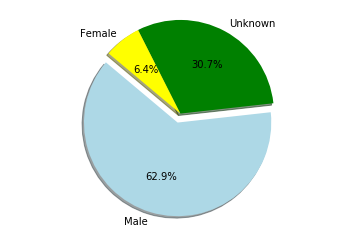

In [96]:
#chart plotting
sex_perpetrator = ["Male","Unknown","Female"]
perpetrator_number = [148388,72441,15193]
colors = ["lightblue","green","yellow"]
explode = (0.1,0,0)
# create a pie chart based upon the above data
plt.pie(perpetrator_number, explode=explode, labels=sex_perpetrator, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("Output/perpetrator_sex.png")
plt.show()

## Perpetrator sex and weapon of choice

In [85]:
perpetrator_weapon_df = homicide_reports_df[['Perpetrator Sex','Weapon','Record ID']] 
perpetrator_weapon_df.head() 

,Perpetrator Sex,Weapon,Record ID
0,Male,Handgun,402433
1,Male,Handgun,402434
2,Male,Blunt Object,402435
3,Female,Blunt Object,402436
4,Unknown,Knife,402437


In [86]:
# Using .rename(columns={}) in order to rename columns
perpetrator_weapon = perpetrator_weapon_df.rename(columns={"Perpetrator Sex":"Sex","Record ID":"Record"}) 
perpetrator_weapon.head() 

,Sex,Weapon,Record
0,Male,Handgun,402433
1,Male,Handgun,402434
2,Male,Blunt Object,402435
3,Female,Blunt Object,402436
4,Unknown,Knife,402437


## Male Perpetrator and weapon of choice

In [87]:
#dropping Unknown sex from the dataframe
mf_df = perpetrator_weapon[perpetrator_weapon.Sex != 'Unknown'] 
mf_df.head() 

,Sex,Weapon,Record
0,Male,Handgun,402433
1,Male,Handgun,402434
2,Male,Blunt Object,402435
3,Female,Blunt Object,402436
6,Male,Rifle,402439


In [88]:
#dropping Female sex from the dataframe
male_weapon = mf_df[mf_df.Sex != 'Female'] 
male_weapon.head() 

,Sex,Weapon,Record
0,Male,Handgun,402433
1,Male,Handgun,402434
2,Male,Blunt Object,402435
6,Male,Rifle,402439
7,Male,Handgun,402440


In [89]:
male_weapon_df = male_weapon[['Weapon','Record']] 
male_weapon_df

,Weapon,Record
0,Handgun,402433
1,Handgun,402434
2,Blunt Object,402435
6,Rifle,402439
7,Handgun,402440
8,Blunt Object,402441
9,Handgun,402442
11,Blunt Object,402444
12,Blunt Object,402445
15,Blunt Object,402448


In [92]:
male_weapon_df['Weapon'].value_counts() 

Handgun          72218
Knife            20175
Blunt Object     17415
Firearm          14685
Unknown           8377
Shotgun           5765
Rifle             5116
Strangulation     1147
Suffocation        950
Fire               900
Gun                838
Drugs              514
Drowning           113
Poison              79
Explosives          57
Fall                39
Name: Weapon, dtype: int64

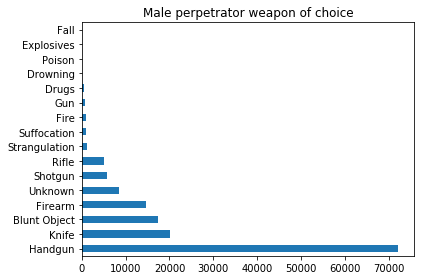

In [97]:
male_weapon_df['Weapon'].value_counts().plot('barh') 
# Set a Title 
plt.title("Male perpetrator weapon of choice")
# Save our graph and show the graph
plt.tight_layout()
plt.savefig("Output/male_weapon.png")
plt.show() 

## Female perpetrators and weapon of choice

In [52]:
#dropping Male sex from the dataframe
female_weapon = mf_df[mf_df.Sex != 'Male'] 
female_weapon.head() 

,Sex,Weapon
3,Female,Blunt Object
14,Female,Drowning
45,Female,Handgun
62,Female,Knife
65,Female,Knife


In [53]:
print(female_weapon["Weapon"].value_counts()) 

Handgun          4109
Knife            3938
Blunt Object     2344
Unknown          1966
Firearm           670
Suffocation       401
Drugs             386
Fire              351
Shotgun           311
Rifle             268
Drowning          178
Strangulation     129
Poison             81
Gun                48
Explosives          8
Fall                5
Name: Weapon, dtype: int64


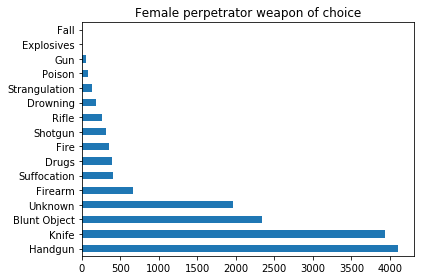

In [98]:
female_weapon['Weapon'].value_counts().plot('barh') 
# Set a Title 
plt.title("Female perpetrator weapon of choice")
# Save our graph and show the graph
plt.tight_layout()
plt.savefig("Output/female_weapon.png")
plt.show() 